In [44]:
from unicodedata import east_asian_width
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def graficar(df):
    fig, ax = plt.subplots(15, figsize=(15,30))
    fig.tight_layout()

    x = range(len(df))
    inde=1
    for i in range(15):
            ax[i].set_title(df.columns[inde])
            ax[i].plot(x, df[df.columns[inde]], linewidth=0.2)
            inde += 1

### Creación de df con todos los datos de Norte 2: Universidad

In [46]:
estaciones = pd.ExcelFile("DatosIniciales\Estaciones.xlsx")
dfNorte2 =pd.read_excel(estaciones, 'PM10')[['date', 'Norte2']]

for i in estaciones.sheet_names:
    union = pd.read_excel(estaciones, str(i))
    union.rename(columns={'Norte2':str(i)}, inplace=True)
    dfNorte2 = pd.merge(dfNorte2, union[['date',str(i)]], on = 'date', how = 'outer')

del dfNorte2['Norte2']
dfNorte2['date'] = dfNorte2['date'].astype('datetime64[ns]')

dfNorte2.head()

,date,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,20.0,NaN,11.0,9.7,2.9,12.0,NaN,NaN,723.0,89.0,7.94,0.0,15.5,44.0,0.0
2,2018-01-01 02:00:00,29.0,25.0,10.0,11.6,5.1,16.7,NaN,NaN,723.2,88.0,7.39,0.0,15.3,43.0,0.0
3,2018-01-01 03:00:00,26.0,18.0,8.0,9.5,4.3,13.6,NaN,NaN,723.4,90.0,6.37,0.0,13.0,48.0,0.0
4,2018-01-01 04:00:00,NaN,11.0,8.0,10.7,4.5,15.0,NaN,NaN,723.8,94.0,5.42,0.0,13.3,48.0,0.0


In [47]:
estaciones = pd.ExcelFile("DatosIniciales\BD_Tec_banderas_contaminantes.xlsx")
dfCentro =pd.read_excel(estaciones, 'PM10')[['Fecha', 'CE']]

for i in ['NO', 'NO2', 'NOx', 'O3']:
    union = pd.read_excel(estaciones, str(i))
    union.rename(columns={'CE':'CE_'+str(i)}, inplace=True)
    dfCentro = pd.merge(dfCentro, union[['Fecha','CE_'+str(i)]], on = 'Fecha', how = 'outer')

del dfCentro['CE']

dfCentro.drop(list(range(365*24)), inplace = True)
dfCentro.rename(columns = {'Fecha':'date'}, inplace = True)
dfCentro.reset_index(inplace=True)
del dfCentro['index']
dfCentro.head()


,date,CE_NO,CE_NO2,CE_NOx,CE_O3
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN
1,2018-01-01 01:00:00,4.1,2.9,7.0,9.0
2,2018-01-01 02:00:00,3.8,2.7,6.4,10.0
3,2018-01-01 03:00:00,4.2,2.6,6.7,8.0
4,2018-01-01 04:00:00,3.9,2.4,6.2,8.0


In [48]:
dfMerge = pd.merge(dfNorte2,dfCentro, on = 'date', how = 'outer')
dfMerge.describe()

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF,CE_NO,CE_NO2,CE_NOx,CE_O3
count,29960.000000,24108.000000,12450.000000,15599.000000,13690.000000,13571.000000,17019.000000,28299.000000,31105.000000,31202.000000,31182.000000,31630.000000,31200.000000,31212.000000,31306.000000,21158.000000,22482.000000,22926.000000,23934.000000
mean,63.242089,20.493261,24.106506,17.367754,25.061059,44.794171,7.413879,1.065399,713.165568,58.839690,23.177562,0.132163,7.613234,114.022972,0.003781,9.856125,9.068735,17.665149,28.535890
std,38.336709,113.038802,18.351800,84.056495,87.896355,94.433413,171.685970,0.581398,3.888025,60.398024,7.063474,0.193930,3.134140,76.455718,0.054190,22.763648,7.278285,24.877711,20.074832
min,2.000000,-9999.000000,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.050000,700.800000,-9999.000000,-5.380000,0.000000,0.500000,1.000000,0.000000,0.500000,0.000000,1.000000,1.000000
25%,38.000000,11.000000,10.000000,3.100000,10.100000,16.200000,5.000000,0.650000,710.600000,43.000000,18.550000,0.000000,5.500000,61.000000,0.000000,2.400000,3.600000,6.200000,12.000000
50%,56.000000,19.000000,20.000000,10.100000,20.000000,36.800000,9.200000,1.020000,712.700000,61.000000,24.010000,0.004000,7.300000,99.000000,0.000000,4.800000,7.000000,11.300000,25.000000
75%,78.000000,29.000000,34.000000,24.700000,37.500000,62.300000,14.600000,1.360000,715.300000,76.000000,28.090000,0.230000,9.400000,134.000000,0.000000,8.700000,12.800000,20.300000,40.000000
max,767.000000,756.000000,167.000000,500.000000,188.600000,500.000000,175.400000,13.790000,738.900000,99.000000,42.270000,0.746000,29.700000,360.000000,2.810000,500.000000,78.100000,500.000000,148.000000


In [49]:
for i in ['NO', 'NO2', 'NOx', 'O3']:
    dfMerge[i].fillna(dfMerge['CE_'+i], inplace = True)
    del dfMerge['CE_'+i]
dfMerge.describe()

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
count,29960.000000,24108.000000,27210.000000,25946.000000,26280.000000,26651.000000,17019.000000,28299.000000,31105.000000,31202.000000,31182.000000,31630.000000,31200.000000,31212.000000,31306.000000
mean,63.242089,20.493261,26.446343,13.784395,16.552059,29.650981,7.413879,1.065399,713.165568,58.839690,23.177562,0.132163,7.613234,114.022972,0.003781
std,38.336709,113.038802,19.748997,67.118364,64.186078,71.140324,171.685970,0.581398,3.888025,60.398024,7.063474,0.193930,3.134140,76.455718,0.054190
min,2.000000,-9999.000000,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.050000,700.800000,-9999.000000,-5.380000,0.000000,0.500000,1.000000,0.000000
25%,38.000000,11.000000,11.000000,2.400000,5.200000,8.200000,5.000000,0.650000,710.600000,43.000000,18.550000,0.000000,5.500000,61.000000,0.000000
50%,56.000000,19.000000,22.000000,5.800000,10.500000,15.700000,9.200000,1.020000,712.700000,61.000000,24.010000,0.004000,7.300000,99.000000,0.000000
75%,78.000000,29.000000,37.000000,16.200000,22.700000,40.600000,14.600000,1.360000,715.300000,76.000000,28.090000,0.230000,9.400000,134.000000,0.000000
max,767.000000,756.000000,167.000000,500.000000,188.600000,500.000000,175.400000,13.790000,738.900000,99.000000,42.270000,0.746000,29.700000,360.000000,2.810000


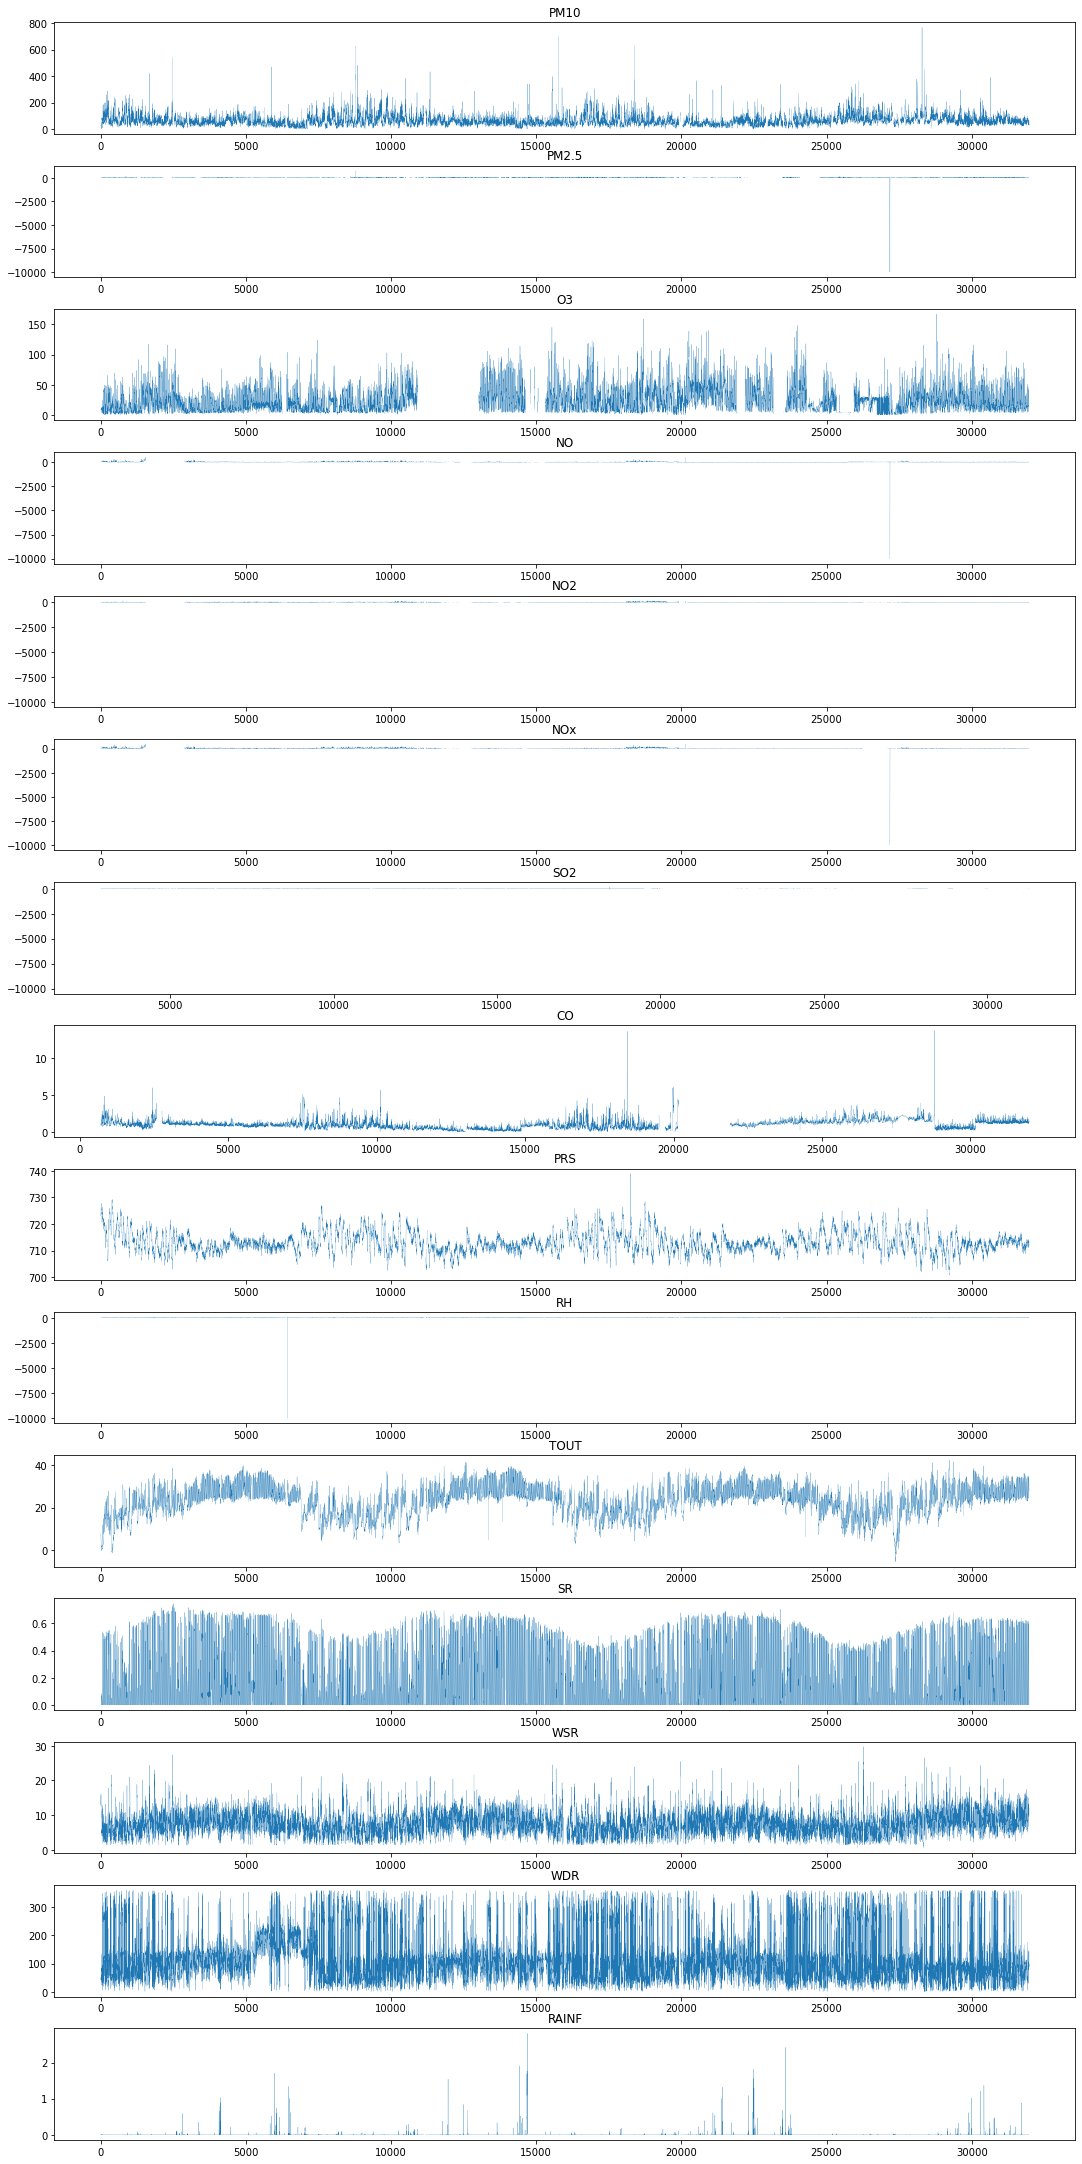

In [50]:
graficar(dfMerge)

### Llenando los NAs linearmente con los datos que se tienen y quitando outliers

In [51]:
dfMerge.describe()

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
count,29960.000000,24108.000000,27210.000000,25946.000000,26280.000000,26651.000000,17019.000000,28299.000000,31105.000000,31202.000000,31182.000000,31630.000000,31200.000000,31212.000000,31306.000000
mean,63.242089,20.493261,26.446343,13.784395,16.552059,29.650981,7.413879,1.065399,713.165568,58.839690,23.177562,0.132163,7.613234,114.022972,0.003781
std,38.336709,113.038802,19.748997,67.118364,64.186078,71.140324,171.685970,0.581398,3.888025,60.398024,7.063474,0.193930,3.134140,76.455718,0.054190
min,2.000000,-9999.000000,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.050000,700.800000,-9999.000000,-5.380000,0.000000,0.500000,1.000000,0.000000
25%,38.000000,11.000000,11.000000,2.400000,5.200000,8.200000,5.000000,0.650000,710.600000,43.000000,18.550000,0.000000,5.500000,61.000000,0.000000
50%,56.000000,19.000000,22.000000,5.800000,10.500000,15.700000,9.200000,1.020000,712.700000,61.000000,24.010000,0.004000,7.300000,99.000000,0.000000
75%,78.000000,29.000000,37.000000,16.200000,22.700000,40.600000,14.600000,1.360000,715.300000,76.000000,28.090000,0.230000,9.400000,134.000000,0.000000
max,767.000000,756.000000,167.000000,500.000000,188.600000,500.000000,175.400000,13.790000,738.900000,99.000000,42.270000,0.746000,29.700000,360.000000,2.810000


In [52]:
df = dfMerge.copy()

upper_bounds = [800, 400, 200, 600, 200, 600, 200, 20, 800, 150,  60, 2, 400]
lower_bounds = [0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 , 300, 0  , -30, 0, 0  ]

In [53]:
df.replace(to_replace=-9999, value=0,inplace=True)
columns_to_chop = ['PM10', 'PM2.5', 'O3', 'NO', 'NO2', 'NOx', 'SO2', 'CO', 'PRS', 'RH', 'TOUT', 'SR', 'WDR']
for i in range(len(columns_to_chop)):
       df[columns_to_chop[i]].where(df[columns_to_chop[i]] > lower_bounds[i], np.nan, inplace = True)
       df[columns_to_chop[i]].where(df[columns_to_chop[i]] < upper_bounds[i], np.nan, inplace = True)

In [54]:
df.describe()

,PM10,PM2.5,O3,NO,NO2,NOx,SO2,CO,PRS,RH,TOUT,SR,WSR,WDR,RAINF
count,29960.000000,24102.000000,27209.000000,25945.000000,26273.000000,26650.000000,17011.000000,28299.000000,31105.000000,31196.000000,31182.000000,16719.000000,31200.000000,31212.000000,31306.000000
mean,63.242089,21.672539,26.447315,14.170318,16.937049,30.027291,10.356657,1.065399,713.165568,59.171528,23.177562,0.250033,7.613234,114.022972,0.003781
std,38.336709,15.613220,19.748709,25.309723,17.394175,35.874429,7.004809,0.581398,3.888025,20.127745,7.063474,0.204155,3.134140,76.455718,0.054190
min,2.000000,2.000000,1.000000,0.500000,0.100000,0.800000,0.500000,0.050000,700.800000,1.000000,-5.380000,0.001000,0.500000,1.000000,0.000000
25%,38.000000,11.000000,11.000000,2.400000,5.200000,8.200000,5.000000,0.650000,710.600000,43.000000,18.550000,0.060000,5.500000,61.000000,0.000000
50%,56.000000,19.000000,22.000000,5.800000,10.500000,15.700000,9.200000,1.020000,712.700000,61.000000,24.010000,0.210000,7.300000,99.000000,0.000000
75%,78.000000,29.000000,37.000000,16.200000,22.700000,40.600000,14.600000,1.360000,715.300000,76.000000,28.090000,0.419000,9.400000,134.000000,0.000000
max,767.000000,343.000000,167.000000,500.000000,188.600000,500.000000,175.400000,13.790000,738.900000,99.000000,42.270000,0.746000,29.700000,360.000000,2.810000


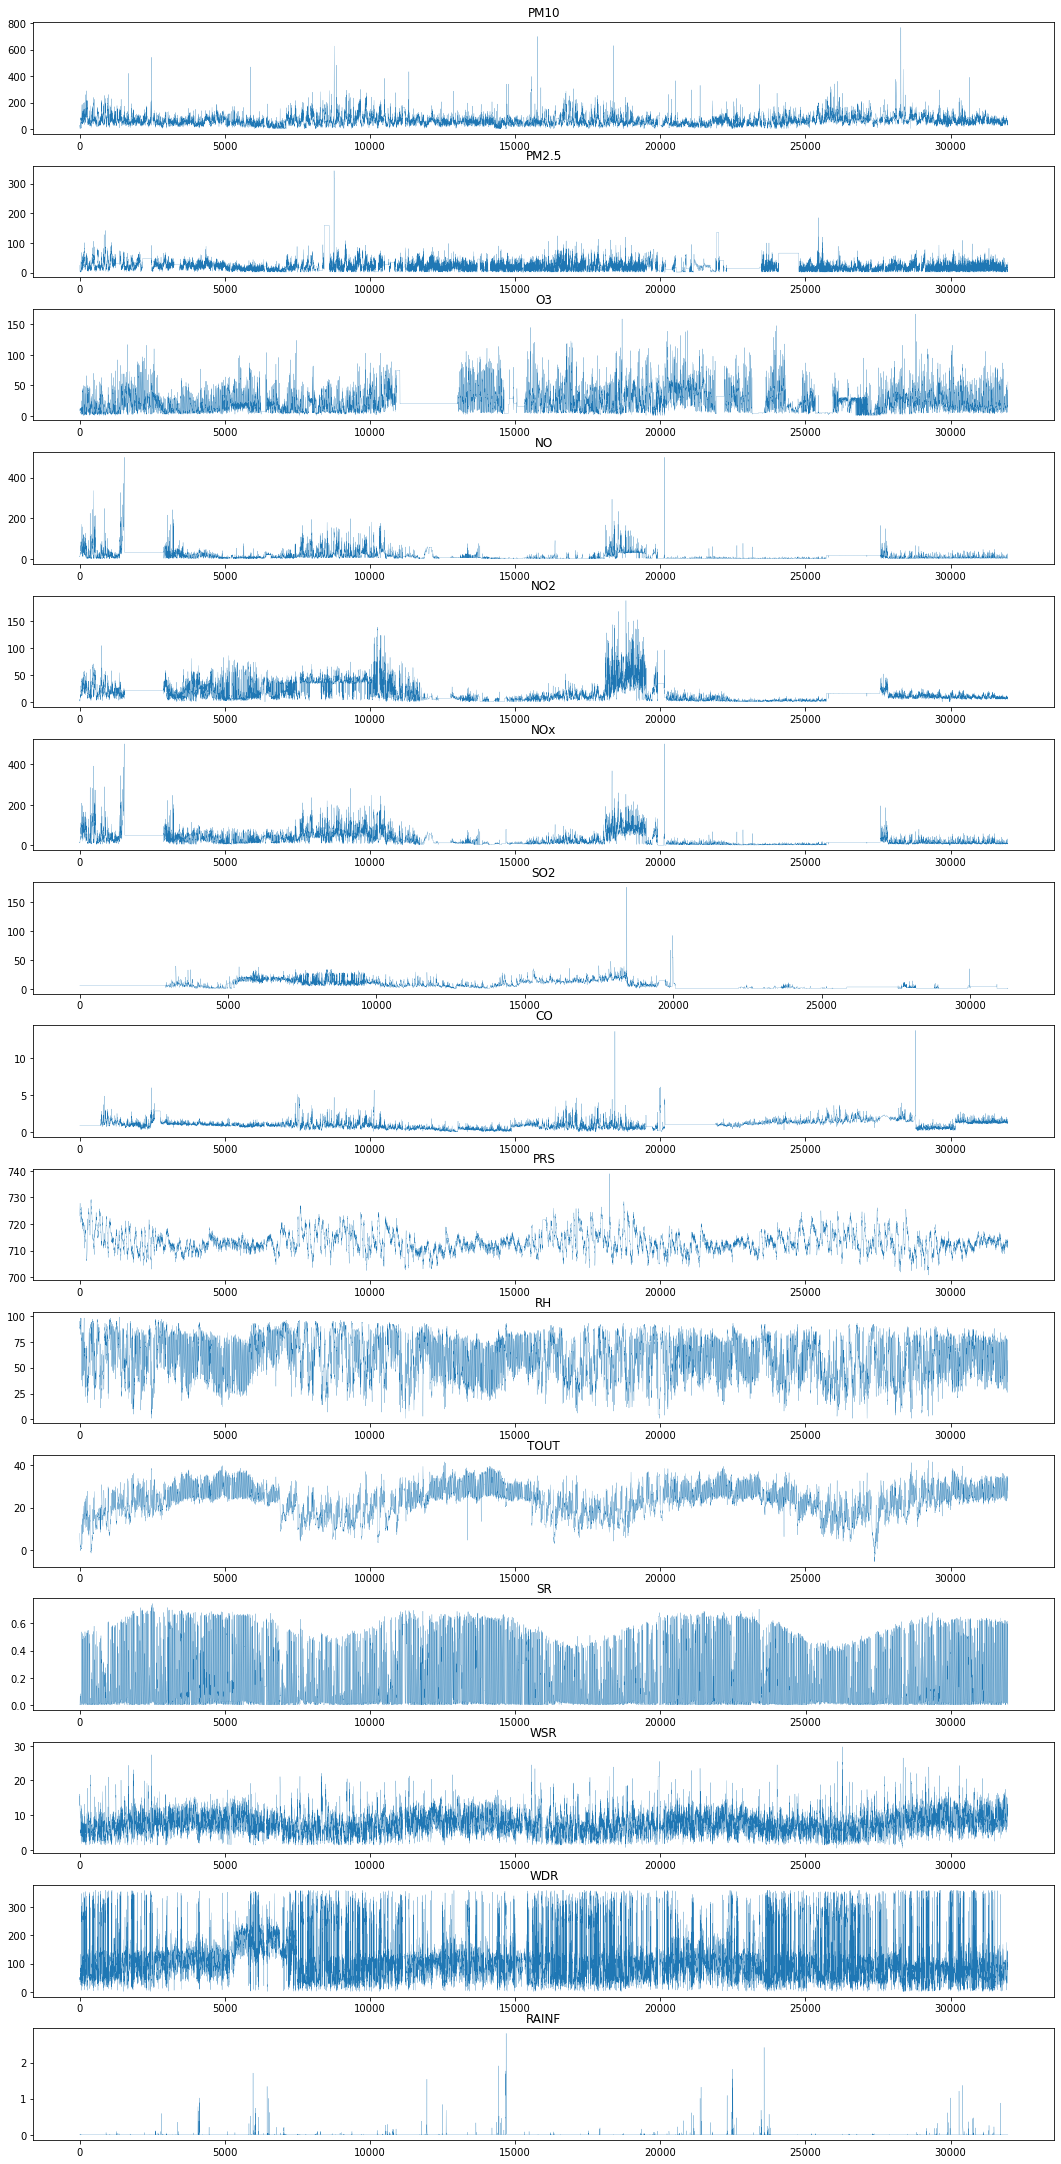

In [55]:
df.fillna(method='bfill',inplace=True)
graficar(df)

### Quitando los outliers utilizando el metodo de percentiles y rellenando estos linearmente

In [56]:
# for i in df.columns[1:15]:
#     Q1=np.percentile(df[i], 25)
#     Q3=np.percentile(df[i], 75)
#     IQR=Q3-Q1
#     upper = Q3 + 1.5*IQR
#     lower = Q1 - 1.5*IQR 
#     df[i].where((df[i] > lower) & (df[i] < upper), np.nan, inplace = True)

In [57]:
df.to_csv('CleanDF.csv')